In [4]:
import numpy as np 
import pandas as pd 
import os 
import h5py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from tabulate import tabulate

In [41]:
hf = h5py.File('Dataset/part_A_train.h5', 'r')
X = np.array(hf['X'])
Y = np.array(hf['Y'])
print(X.shape,Y.shape)

""" To calculate the class frequencies """

for i in range(Y.shape[1]):
    freq = np.sum(Y[:,i])
    print("The frequency of class " + str(i) + " is " + str(freq) + " / " + str(Y.shape[0]) )

# y = []
# for i in range(Y.shape[0]):
#     for j in range(Y.shape[1]):
#         if(Y[i,j] == 1):
#             y.append(j)
# y = np.array(y)
# Y = y.reshape(-1,1)
# Y = np.squeeze(Y)
# # print(X[0])
# print(Y.shape)

(4200, 784) (4200, 10)
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = y)

In [43]:
freq = []
freq.append("Frequency")
perc = []
perc.append("Ratio")
headers = []
headers.append("#")
for i in range(y_train.shape[1]):
    freq_c = np.sum(y_train[:,i])
    freq.append(freq_c)
    perc.append(round(freq_c/y_train.shape[0],3))
    headers.append("class " + str(i))
    print("The frequency of class " + str(i) + " is " + str(freq_c) + " / " + str(y_train.shape[0]) )
l = []
l.append(freq)
l.append(perc)
table = tabulate(l, headers=headers)
print("\n")
print(table)

The frequency of class 0 is 320.0 / 3360
The frequency of class 1 is 395.0 / 3360
The frequency of class 2 is 314.0 / 3360
The frequency of class 3 is 339.0 / 3360
The frequency of class 4 is 333.0 / 3360
The frequency of class 5 is 318.0 / 3360
The frequency of class 6 is 353.0 / 3360
The frequency of class 7 is 345.0 / 3360
The frequency of class 8 is 328.0 / 3360
The frequency of class 9 is 315.0 / 3360


#            class 0    class 1    class 2    class 3    class 4    class 5    class 6    class 7    class 8    class 9
---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
Frequency    320        395        314        339        333        318        353        345        328        315
Ratio          0.095      0.118      0.093      0.101      0.099      0.095      0.105      0.103      0.098      0.094


In [44]:
freq = []
freq.append("Frequency")
perc = []
perc.append("Ratio")
headers = []
headers.append("#")
for i in range(y_test.shape[1]):
    freq_c = np.sum(y_test[:,i])
    freq.append(freq_c)
    perc.append(round(freq_c/y_test.shape[0],3))
    headers.append("class " + str(i))
    print("The frequency of class " + str(i) + " is " + str(freq_c) + " / " + str(y_test.shape[0]) )
l = []
l.append(freq)
l.append(perc)
table = tabulate(l, headers=headers)
print("\n")
print(table)

The frequency of class 0 is 80.0 / 840
The frequency of class 1 is 99.0 / 840
The frequency of class 2 is 79.0 / 840
The frequency of class 3 is 85.0 / 840
The frequency of class 4 is 83.0 / 840
The frequency of class 5 is 80.0 / 840
The frequency of class 6 is 88.0 / 840
The frequency of class 7 is 86.0 / 840
The frequency of class 8 is 82.0 / 840
The frequency of class 9 is 78.0 / 840


#            class 0    class 1    class 2    class 3    class 4    class 5    class 6    class 7    class 8    class 9
---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
Frequency     80         99         79         85         83         80         88         86         82         78
Ratio          0.095      0.118      0.094      0.101      0.099      0.095      0.105      0.102      0.098      0.093


In [25]:
standardScalar = StandardScaler()
X_train = standardScalar.fit_transform(X_train)
X_test = standardScalar.transform(X_test)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 123,n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [8]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.06327579 0.04597528 0.03972614 0.03382077 0.02900687 0.02465617
 0.02063794 0.01982879 0.01729555 0.01549596 0.01516823 0.01321109
 0.01273773 0.01236947 0.01162282 0.01150743 0.01063814 0.01057076
 0.00979194 0.0096969  0.00926483 0.00910479 0.00885184 0.00866194
 0.00849303 0.00807979 0.00792032 0.00774736 0.00752252 0.00716454
 0.00702823 0.00683316 0.00672893 0.00651419 0.00639368 0.00628106
 0.0062595  0.00611504 0.00596377 0.00590448 0.00578223 0.00568126
 0.00550676 0.0054311  0.00531628 0.0051776  0.00504468 0.00494904
 0.00486129 0.00464602]


In [9]:
print(X_train.shape)


(3360, 50)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [14]:
logistic = LogisticRegression(solver = "saga", max_iter  = 10000, verbose = 1)
logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)
y_pred = logistic.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

pres_score = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

from tabulate import tabulate

l = [ [acc_score, pres_score, f1]]
table = tabulate(l, headers=["Accuracy score", "Precision Score", "f1 score"], tablefmt='orgtbl')
print("\n\n")
print(table)


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2115 epochs took 4 seconds
convergence after 3224 epochs took 8 seconds
convergence after 1259 epochs took 3 seconds
convergence after 4729 epochs took 11 seconds
convergence after 2262 epochs took 5 seconds
convergence after 1687 epochs took 4 seconds
convergence after 2699 epochs took 6 seconds
convergence after 2475 epochs took 6 seconds
convergence after 1499 epochs took 3 seconds
convergence after 3360 epochs took 8 seconds



|   Accuracy score |   Precision Score |   f1 score |
|------------------+-------------------+------------|
|         0.879762 |          0.873893 |   0.871003 |


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   58.5s finished


In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.006s...
[t-SNE] Computed neighbors for 3360 samples in 0.892s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.441751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.592880
[t-SNE] KL divergence after 1000 iterations: 1.285138


In [12]:
import pickle 
f = open("Pickle_files/tnse_pca_2d", "wb")
pickle.dump(tsne_em,f)

In [13]:
tsne_em[:,0].shape,tsne_em[:,1].shape

((3360,), (3360,))

In [17]:
df_tsne_pca_2d = pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne_pca_2d["x"] = tsne_em[:,0]
df_tsne_pca_2d["y"] = tsne_em[:,1]
df_tsne_pca_2d["label"] = y_train

In [18]:
df_tsne_pca_2d.head()

,x,y,label
0,2.206054,-6.560528,3
1,-16.735588,9.379822,5
2,28.176291,10.534633,4
3,-49.264938,-37.366234,6
4,15.372981,-9.604134,8


In [19]:
df_tsne_pca_2d["label"].value_counts()

1    388
6    353
8    346
4    341
9    333
3    331
7    326
5    318
0    315
2    309
Name: label, dtype: int64

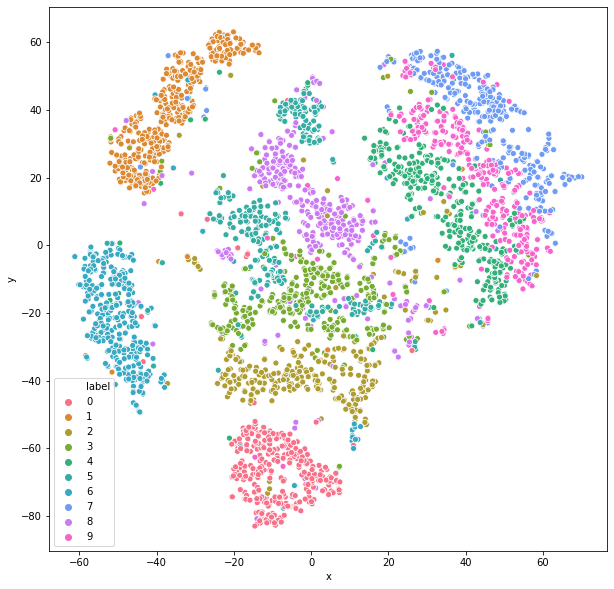

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne_pca_2d["x"], y = df_tsne_pca_2d["y"], hue = df_tsne_pca_2d["label"], palette = sns.color_palette("husl", 10) )
plt.show()

In [18]:
""" Applying SVD of the provided dataset """

' Applying SVD of the provided dataset '

In [26]:
from sklearn.decomposition import TruncatedSVD

In [27]:
svd  = TruncatedSVD(random_state = 123,n_components = 50)
svd.fit(X_train)
# apply transform to dataset
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)

In [28]:
print(X_train.shape)

(3360, 50)


In [30]:
logistic = LogisticRegression(solver = "saga", max_iter  = 10000, verbose = 1 )
logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)
y_pred = logistic.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

pres_score = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

from tabulate import tabulate

l = [ [acc_score, pres_score, f1]]
table = tabulate(l, headers=["Accuracy score", "Precision Score", "f1 score"], tablefmt='orgtbl')
print("\n\n")
print(table)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 2329 epochs took 6 seconds
convergence after 3261 epochs took 8 seconds
convergence after 1254 epochs took 4 seconds
convergence after 4757 epochs took 11 seconds
convergence after 2230 epochs took 6 seconds
convergence after 1774 epochs took 4 seconds
convergence after 2716 epochs took 7 seconds
convergence after 2291 epochs took 5 seconds
convergence after 1546 epochs took 4 seconds
convergence after 2039 epochs took 5 seconds



|   Accuracy score |   Precision Score |   f1 score |
|------------------+-------------------+------------|
|         0.880952 |          0.874865 |   0.872404 |


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.5s finished


In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.007s...
[t-SNE] Computed neighbors for 3360 samples in 1.015s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.446044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.589691
[t-SNE] KL divergence after 1000 iterations: 1.274800


In [31]:
import pickle 
f = open("Pickle_files/tnse_svd_2d", "wb")
pickle.dump(tsne_em,f)

In [33]:
df_tsne_svd_2d = pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne_svd_2d["x"] = tsne_em[:,0]
df_tsne_svd_2d["y"] = tsne_em[:,1]
df_tsne_svd_2d["label"] = y_train

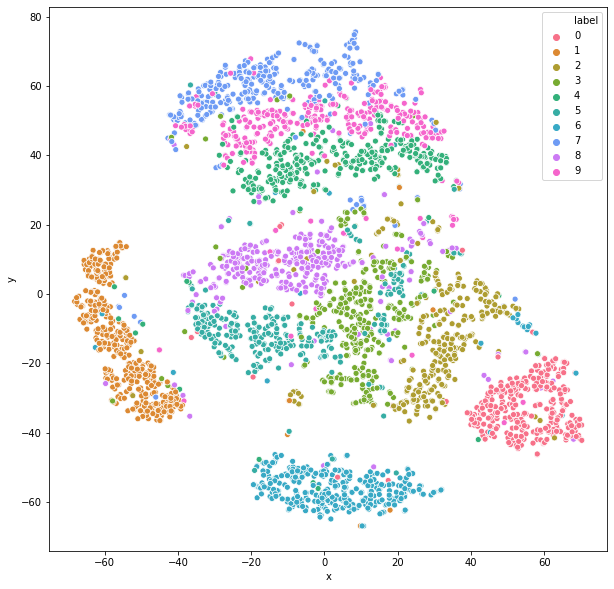

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne_svd_2d["x"], y = df_tsne_svd_2d["y"], hue = df_tsne_svd_2d["label"], palette = sns.color_palette("husl", 10) )
plt.show()